In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('https://docs.google.com/spreadsheets/d/1kqfX08UG3Y5eIS7d8siQFGu8M1x8c5Vt/export')
df_no_header = data[4:]
df_no_header

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1.05,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 138,1.5,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147
4,год,неделя,Начало нед,"Продажи, рубли","Продажи, упаковки","Продажи, рубли","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки",...,Итого,"ТВ, trp\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, рубли","Диджитал, руб","ТВ спонсорство, рубли","OOH, рубли","Радио, рубли",Итого,NaN
5,2019,1,2018-12-31 00:00:00,41535567.339,114621.15,0,0,0,0,0,...,11834254.13,207.903106,15.3615,9085528.010323,0,0,0,0,9085528.01,NaN
6,NaN,2,2019-01-07 00:00:00,51222286.227,141523.2,0,0,0,0,0,...,13996532.16,317.467542,25.5255,10599782.67871,0,0,0,0,10599782.68,NaN
7,NaN,3,2019-01-14 00:00:00,57127348.908,157926.3,0,0,0,0,0,...,11466294.66,192.816682,13.9125,10599782.67871,0,0,0,0,10599782.68,NaN
8,NaN,4,2019-01-21 00:00:00,63040990.9395,173746.65,0,0,0,0,0,...,10764632.16,138.371621,8.0535,10599782.67871,0,0,0,0,10599782.68,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,NaN,49,2024-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,50,2024-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,NaN,51,2024-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,NaN,52,2024-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
namelist = [v for i, v in df_no_header.iloc[0].reset_index(drop=True).items()]
namelist_wo_dups = [v + str(namelist[:i].count(v) + 1) if namelist.count(v) > 1 else v for i, v in enumerate(namelist)]
pd.DataFrame(namelist_wo_dups)

,0
0,год
1,неделя
2,Начало нед
3,"Продажи, рубли1"
4,"Продажи, упаковки"
...,...
143,"ТВ спонсорство, рубли13"
144,"OOH, рубли13"
145,"Радио, рубли14"
146,Итого13


In [4]:
df2 = df_no_header
df2.columns = namelist_wo_dups
df = df2.drop([4]).reset_index(drop=True)
df.insert(0, 'time_idx', df.index)
df

,time_idx,год,неделя,Начало нед,"Продажи, рубли1","Продажи, упаковки","Продажи, рубли2","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб",...,Итого12,"ТВ, trp\n(Ж 30-60 ВС)13","ТВ, охват 5+\n(Ж 30-60 ВС)13","ТВ, рубли13","Диджитал, руб13","ТВ спонсорство, рубли13","OOH, рубли13","Радио, рубли14",Итого13,NaN
0,0,2019,1,2018-12-31 00:00:00,41535567.339,114621.15,0,0,0,0,...,11834254.13,207.903106,15.3615,9085528.010323,0,0,0,0,9085528.01,NaN
1,1,NaN,2,2019-01-07 00:00:00,51222286.227,141523.2,0,0,0,0,...,13996532.16,317.467542,25.5255,10599782.67871,0,0,0,0,10599782.68,NaN
2,2,NaN,3,2019-01-14 00:00:00,57127348.908,157926.3,0,0,0,0,...,11466294.66,192.816682,13.9125,10599782.67871,0,0,0,0,10599782.68,NaN
3,3,NaN,4,2019-01-21 00:00:00,63040990.9395,173746.65,0,0,0,0,...,10764632.16,138.371621,8.0535,10599782.67871,0,0,0,0,10599782.68,NaN
4,4,NaN,5,2019-01-28 00:00:00,67336888.8675,185551.8,0,0,0,0,...,10984967.91,286.984113,24.2235,12893092.405548,0,0,0,0,12893092.41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,NaN,49,2024-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,310,NaN,50,2024-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,311,NaN,51,2024-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,312,NaN,52,2024-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_known = df[:244].drop(columns=['год', 'неделя'])
df_known

,time_idx,Начало нед,"Продажи, рубли1","Продажи, упаковки","Продажи, рубли2","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки","раствор 0.01 % 50 мл N1, упаковки",...,Итого12,"ТВ, trp\n(Ж 30-60 ВС)13","ТВ, охват 5+\n(Ж 30-60 ВС)13","ТВ, рубли13","Диджитал, руб13","ТВ спонсорство, рубли13","OOH, рубли13","Радио, рубли14",Итого13,NaN
0,0,2018-12-31 00:00:00,41535567.339,114621.15,0,0,0,0,0,0,...,11834254.13,207.903106,15.3615,9085528.010323,0,0,0,0,9085528.01,NaN
1,1,2019-01-07 00:00:00,51222286.227,141523.2,0,0,0,0,0,0,...,13996532.16,317.467542,25.5255,10599782.67871,0,0,0,0,10599782.68,NaN
2,2,2019-01-14 00:00:00,57127348.908,157926.3,0,0,0,0,0,0,...,11466294.66,192.816682,13.9125,10599782.67871,0,0,0,0,10599782.68,NaN
3,3,2019-01-21 00:00:00,63040990.9395,173746.65,0,0,0,0,0,0,...,10764632.16,138.371621,8.0535,10599782.67871,0,0,0,0,10599782.68,NaN
4,4,2019-01-28 00:00:00,67336888.8675,185551.8,0,0,0,0,0,0,...,10984967.91,286.984113,24.2235,12893092.405548,0,0,0,0,12893092.41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,2023-07-31 00:00:00,56931505.0605,110088.3,415482902.6,243689995.8885,122713435.509,29294571.054,412081.95,318306.45,...,NaN,0,0,0,0,0,0,0,NaN,NaN
240,240,2023-08-07 00:00:00,59881512.894,115345.65,0,0,0,0,0,0,...,NaN,0,0,0,0,0,0,0,NaN,NaN
241,241,2023-08-14 00:00:00,61112178.456,117761.7,0,0,0,0,0,0,...,69394.5,0,0,0,0,0,0,0,NaN,NaN
242,242,2023-08-21 00:00:00,61594925.028,118356,0,0,0,0,0,0,...,78529.5,0,0,0,0,0,0,0,NaN,NaN


In [6]:
df_known = df_known.replace({'0':np.nan, 0:np.nan})
nan_percent_to_drop = 0.8
labels_to_drop = [x for x in df_known.columns if df_known[x].isna().sum()/len(df_known.index) > nan_percent_to_drop]
labels_to_interpolate = [x for x in df_known.columns if 0 < df_known[x].isna().sum()/len(df_known.index) <= nan_percent_to_drop]

In [7]:
df_fucked = df_known.copy()
df_fucked = df_fucked.drop(columns=labels_to_drop)
df_fucked[labels_to_interpolate] = df_fucked[labels_to_interpolate].interpolate(method='linear').fillna(0)

In [8]:
from sklearn.preprocessing import minmax_scale, scale

cols = df_fucked.select_dtypes(np.number).columns
df_fucked[cols] = minmax_scale(df_fucked[cols])
df_fucked.time_idx = df_fucked.index.astype(int)

In [9]:
df_fucked

,time_idx,Начало нед,"Продажи, рубли1","Продажи, упаковки",Дистрибуция Мирамистин,Выписки,Статистика заболеваемости,Индекс цены,Развитие Дженериков \n(средняя дистрибуция),Развитие Дженериков \n(кол-во брендов),...,"ТВ, охват 5+\n(Ж 30-60 ВС)12","ТВ, рубли12","Диджитал, руб12","ТВ Рег, рубли6",Итого12,"ТВ, trp\n(Ж 30-60 ВС)13","ТВ, охват 5+\n(Ж 30-60 ВС)13","ТВ, рубли13","Диджитал, руб13",Итого13
0,0,2018-12-31,0.010701,0.047505,0.507087,1.0,0.077511,0.315287,0.000000,0.0,...,0.304161,1645238.93371,0.493452,0.233468,0.340175,0.503814,0.557590,9085528.010323,0.000000,0.319209
1,1,2019-01-07,0.062402,0.102496,0.507087,1.0,0.182860,0.315287,0.000000,0.0,...,0.311757,1919445.422661,0.607078,0.273863,0.402392,0.773306,0.926773,10599782.67871,0.000000,0.372445
2,2,2019-01-14,0.093919,0.136026,0.507087,1.0,0.250000,0.315287,0.000000,0.0,...,0.187583,1919445.422661,0.193682,0.273863,0.329588,0.466706,0.504958,10599782.67871,0.000000,0.372445
3,3,2019-01-21,0.125482,0.168365,0.507087,1.0,0.318777,0.315287,0.000000,0.0,...,0.493395,1919445.422661,0.079042,0.273863,0.309398,0.332790,0.292143,10599782.67871,0.000000,0.372445
4,4,2019-01-28,0.148410,0.192496,0.507087,1.0,0.414301,0.315287,0.000000,0.0,...,0.188243,1911792.160306,0.095254,0.278224,0.315738,0.698327,0.879481,12893092.405548,0.000000,0.453070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,2023-07-31,0.092874,0.038239,1.000000,0.0,0.027293,0.320211,0.869632,1.0,...,0.548547,0,0.013238,0.120937,0.001574,0.507598,0.524027,0,0.215882,0.000000
240,240,2023-08-07,0.108619,0.048986,1.000000,0.0,0.035480,0.430165,0.967791,1.0,...,0.548547,0,0.011216,0.120937,0.001616,0.507598,0.524027,0,0.215882,0.000000
241,241,2023-08-14,0.115187,0.053924,1.000000,0.0,0.038210,0.430165,0.967791,1.0,...,0.548547,0,0.009193,0.120937,0.001657,0.507598,0.524027,0,0.215882,0.000000
242,242,2023-08-21,0.117764,0.055139,1.000000,0.0,0.049127,0.430165,0.967791,1.0,...,0.548547,0,0.010686,0.120937,0.001920,0.507598,0.524027,0,0.215882,0.000000


/tmp/ipykernel_63260/839425375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_fucked.corr()['Продажи, рубли1']


<Axes: >

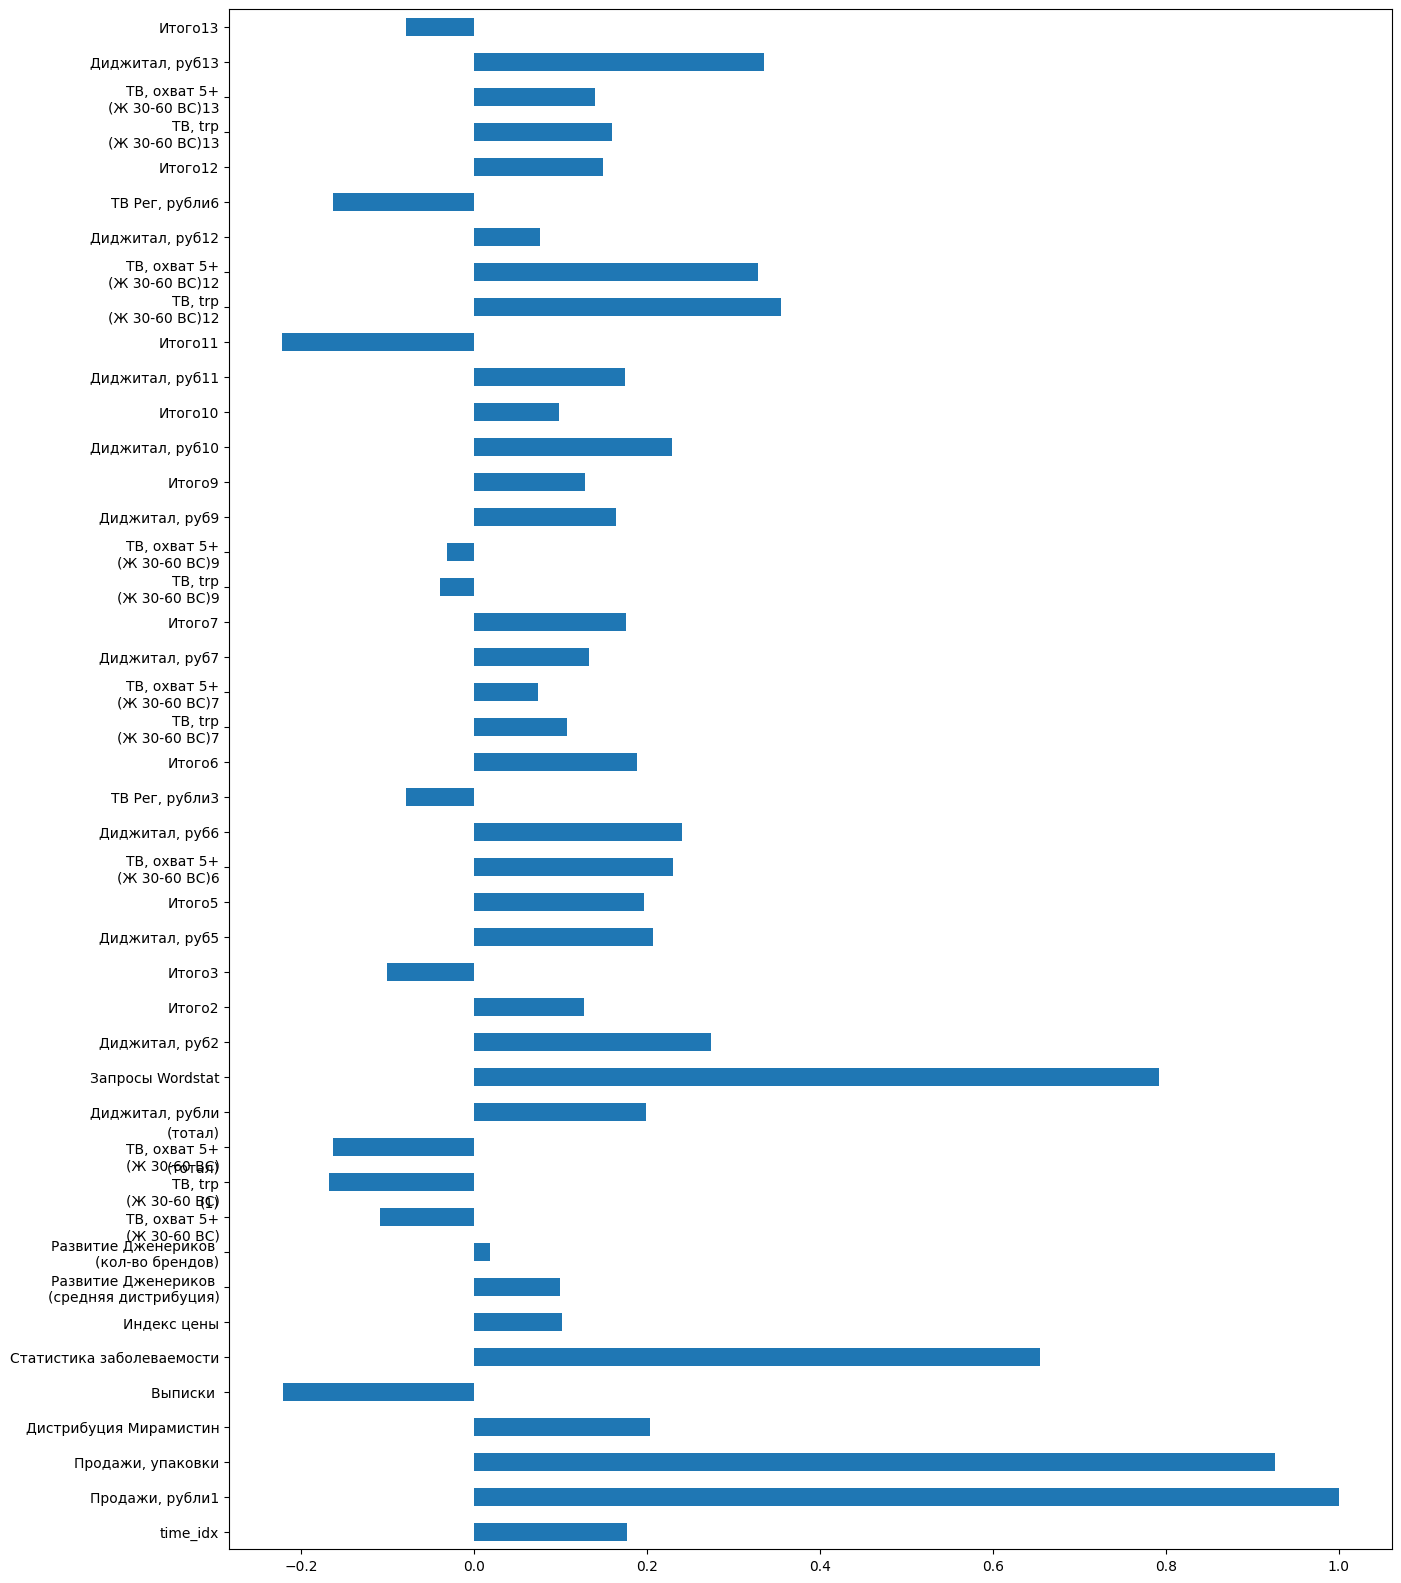

In [10]:
corr_matrix = df_fucked.corr()['Продажи, рубли1']
corr_matrix.plot(kind='barh', figsize=(15,20))

<Axes: >

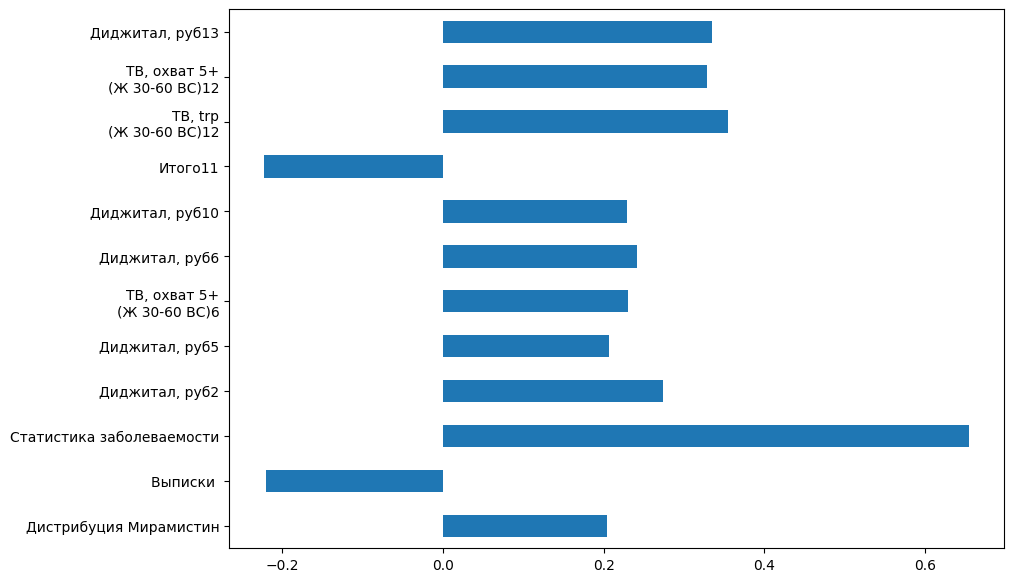

In [11]:
upper_threshold = 0.7
lower_threshold = 0.2
mask1 = (corr_matrix[:] < -upper_threshold) | (corr_matrix[:] > upper_threshold)
mask2 = (corr_matrix[:] > -lower_threshold) & (corr_matrix[:] < lower_threshold)
np.bitwise_or(mask1, mask2)

correlated = corr_matrix.drop(corr_matrix[mask1 | mask2].index)
correlated.plot(kind='barh', figsize=(10,7))

In [49]:
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
import numpy as np
import pandas as pd
import torch

from pytorch_forecasting import Baseline, TimeSeriesDataSet, TemporalFusionTransformer, DeepAR, NHiTS
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import RMSE, MAE, SMAPE
from pytorch_forecasting.metrics import PoissonLoss, QuantileLoss, NormalDistributionLoss, MQF2DistributionLoss

from torcheval.metrics.functional import r2_score

In [13]:
cols = ['time_idx', 'Начало нед', 'Продажи, упаковки']+correlated.index.to_list()

In [14]:
df_corr = df_fucked[cols]
df_corr

,time_idx,Начало нед,"Продажи, упаковки",Дистрибуция Мирамистин,Выписки,Статистика заболеваемости,"Диджитал, руб2","Диджитал, руб5","ТВ, охват 5+\n(Ж 30-60 ВС)6","Диджитал, руб6","Диджитал, руб10",Итого11,"ТВ, trp\n(Ж 30-60 ВС)12","ТВ, охват 5+\n(Ж 30-60 ВС)12","Диджитал, руб13"
0,0,2018-12-31,0.047505,0.507087,1.0,0.077511,0.000000,0.000000,0.000000,0.000000,0.000000,0.226847,0.373082,0.304161,0.000000
1,1,2019-01-07,0.102496,0.507087,1.0,0.182860,0.000000,0.000000,0.000000,0.000000,0.000000,0.263269,0.276850,0.311757,0.000000
2,2,2019-01-14,0.136026,0.507087,1.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292314,0.192312,0.187583,0.000000
3,3,2019-01-21,0.168365,0.507087,1.0,0.318777,0.000000,0.000000,0.000000,0.000000,0.000000,0.288977,0.393330,0.493395,0.000000
4,4,2019-01-28,0.192496,0.507087,1.0,0.414301,0.027286,0.000000,0.000000,0.000000,0.000000,0.407476,0.205784,0.188243,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,2023-07-31,0.038239,1.000000,0.0,0.027293,0.388889,0.004905,0.000356,0.001648,0.038031,0.000202,0.465881,0.548547,0.215882
240,240,2023-08-07,0.048986,1.000000,0.0,0.035480,0.388889,0.004905,0.000356,0.001648,0.038747,0.000360,0.465881,0.548547,0.215882
241,241,2023-08-14,0.053924,1.000000,0.0,0.038210,0.388889,0.004905,0.000356,0.001648,0.039462,0.000519,0.465881,0.548547,0.215882
242,242,2023-08-21,0.055139,1.000000,0.0,0.049127,0.388889,0.004905,0.000356,0.001648,0.062001,0.000127,0.465881,0.548547,0.215882


In [74]:
#df_corr['Продажи, упаковки'].plot()

In [75]:
#rolling_mean = df_corr['Продажи, упаковки'].rolling(window=60, center=True).mean()
#df_corr['Продажи, упаковки'] = df_corr['Продажи, упаковки'] - rolling_mean

In [76]:
#df_corr['Продажи, упаковки'].plot()

In [77]:
df_corr['group'] = 0
df_corr['time_idx'] = df_fucked.index

/tmp/ipykernel_63260/1848822636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['group'] = 0
/tmp/ipykernel_63260/1848822636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['time_idx'] = df_fucked.index


In [78]:
from pytorch_forecasting import TimeSeriesDataSet
#from pytorch_forecasting import NaNLabelEncoder
encoder_length = 56
pred_length = 28
training_cutoff = df_corr['time_idx'].max() - pred_length


train_dataset = TimeSeriesDataSet(
    df_corr[lambda x: x.time_idx <= training_cutoff],
    time_idx = 'time_idx',
    target = 'Продажи, упаковки',
    group_ids = ['group'],
    min_encoder_length = encoder_length, # = то, на сколько значений НАЗАД мы смотрим
    max_encoder_length = encoder_length,
    min_prediction_length = pred_length, # = то, на сколько значений ВПЕРЕД мы прогнозируем
    max_prediction_length = pred_length,
    time_varying_unknown_reals = ['Продажи, упаковки'],
)

validation_dataset = TimeSeriesDataSet.from_dataset(train_dataset, df_corr, predict=True, stop_randomization=True, min_prediction_idx=training_cutoff + 1)

batch_size = 16  # set this between 32 to 128
train_dataloader = train_dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=2)
train_evaluation_dataloader = train_dataset.to_dataloader(train=False, batch_size=batch_size, num_workers=2, batch_sampler="synchronized")
validation_dataloader = validation_dataset.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=2)

In [79]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=True, mode="min")
lr_logger = LearningRateMonitor(logging_interval='step', log_momentum=True)  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=200,
    accelerator='auto',
    enable_model_summary=True,
    #gradient_clip_val=0.1,
    callbacks=[lr_logger, early_stop_callback],
    enable_progress_bar=True, #val_check_interval=10,
    #log_every_n_steps=10,
    logger=logger
)

net = NHiTS.from_dataset(
     train_dataset,
     learning_rate=0.05,
     hidden_size=128,
     loss=MQF2DistributionLoss(prediction_length=pred_length),
     optimizer="AdamW"
)

trainer.fit(
    net,
    train_dataloaders=train_dataloader,
    val_dataloaders=validation_dataloader
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/lucretia/cardiointegro/cardio_venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/home/lucretia/cardiointegro/cardio_venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.

  | Name            | Type                 | Params
---------------------------------------------------------
0 | loss            | MQF2DistributionLoss | 6.4 K 
1 | logging_metrics | ModuleList           | 0     
2 | embeddings      | MultiEmbedding  

Sanity Checking: |                                                                           | 0/? [00:00<?, ?…

/home/lucretia/cardiointegro/cardio_venv/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (8) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                  | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved. New best score: 6228100.500


Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 6228100.500 >= min_delta = 0.0001. New best score: 0.019


Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.018


Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.017


Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.016


Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 0.014


Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.013


Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.012


Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.012


Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.011


Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.010


Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 0.010


Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 0.009


Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Validation: |                                                                                | 0/? [00:00<?, ?…

Monitored metric val_loss did not improve in the last 10 records. Best score: 0.009. Signaling Trainer to stop.


In [80]:
best_model_path = trainer.checkpoint_callback.best_model_path
print(best_model_path)
best_deepvar = NHiTS.load_from_checkpoint(best_model_path)

lightning_logs/lightning_logs/version_28/checkpoints/epoch=29-step=240.ckpt


In [81]:
from pytorch_forecasting.metrics import MAPE
from sklearn.metrics import r2_score

def evaluate(predictions, answers):
    mape_metric = MAPE()
    mape = mape_metric(predictions, answers)
    rsq = r2_score(predictions.numpy().flatten(), answers.numpy().flatten())
    print("R-squared (RSQ):", rsq)
    print("Mean Absolute Percentage Error (MAPE):", mape.item())

In [82]:
%%time
predictions = best_deepvar.predict(validation_dataloader)
# Запишем ответы из валидации в один тензор, чтобы быстрее считать метрики
val_answers = torch.cat([y[0] for x, y in iter(validation_dataloader)])
predictions.size()

print("Our model predictions:")
evaluate(predictions, val_answers)

#baseline_predictions = Baseline().predict(validation_dataloader, return_y=False)
#print("Baseline model predictions:")
#evaluate(baseline_predictions, val_answers)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Our model predictions:
R-squared (RSQ): -61.93264735952553
Mean Absolute Percentage Error (MAPE): 1.7381349802017212
CPU times: user 215 ms, sys: 68.3 ms, total: 283 ms
Wall time: 221 ms


In [83]:
test_dataset = TimeSeriesDataSet.from_dataset(train_dataset,
                                      df_corr,
                                      min_prediction_idx=training_cutoff+1,
                                      predict_mode=True)

test_loader = test_dataset.to_dataloader(
    train=False, batch_size=batch_size, num_workers=2, batch_sampler="synchronized"
)

In [84]:
test_dataset_ = TimeSeriesDataSet

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


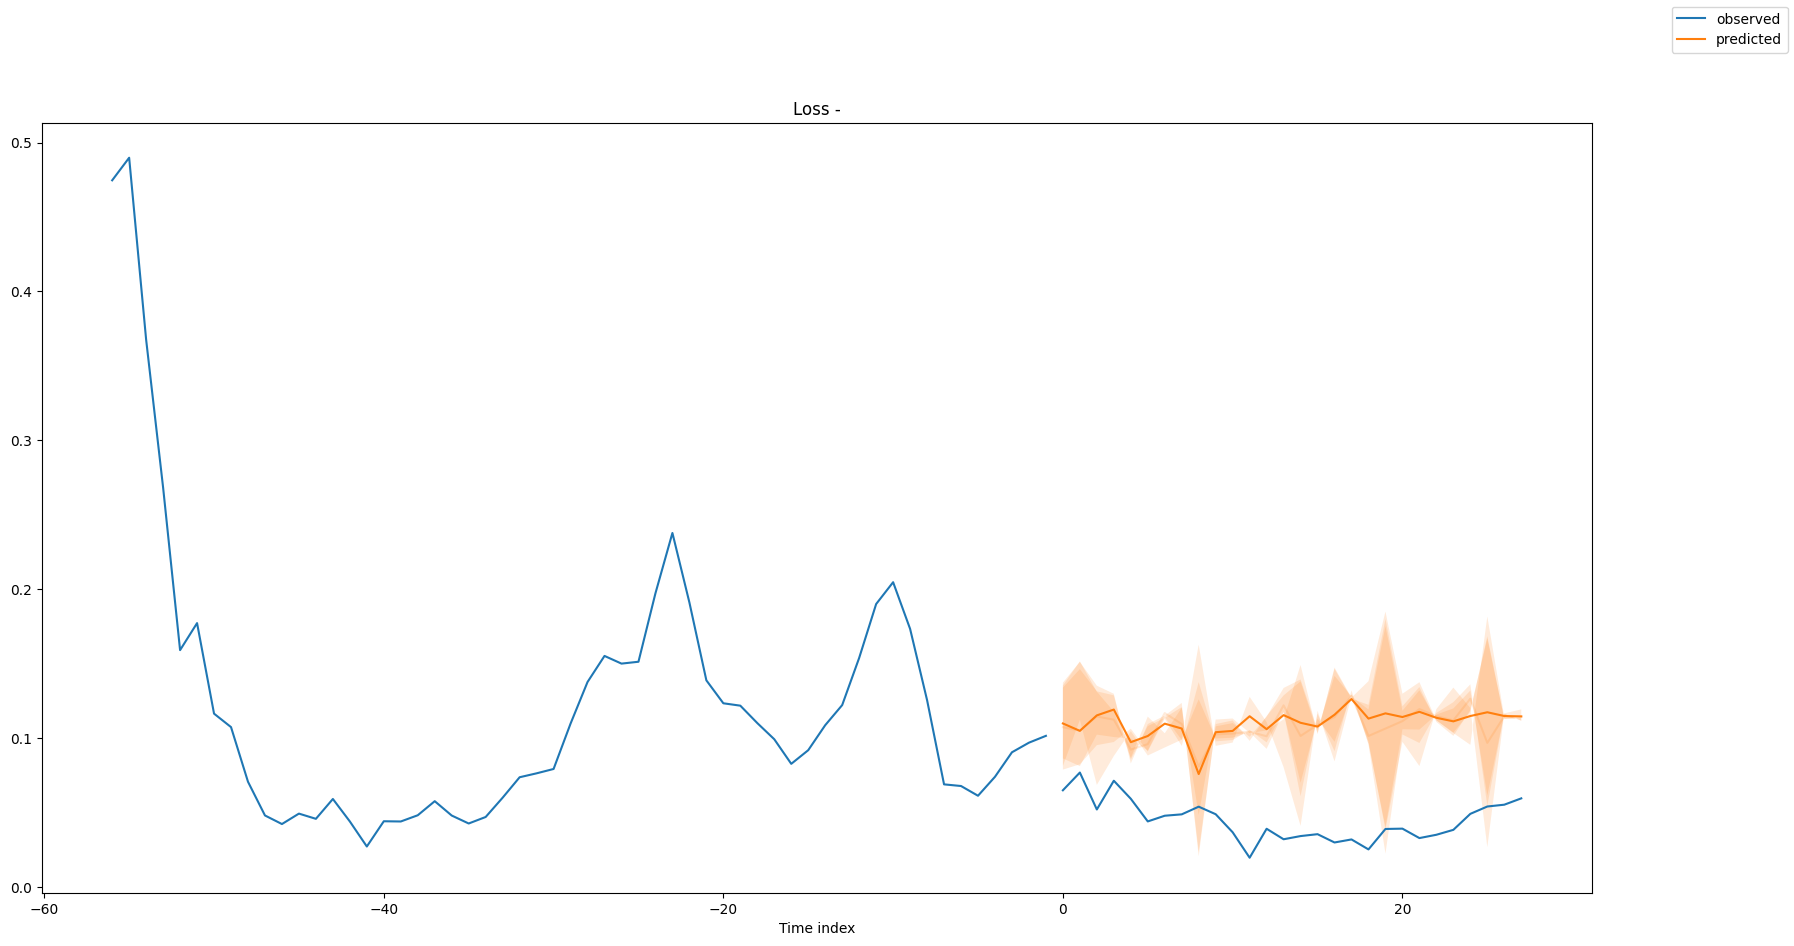

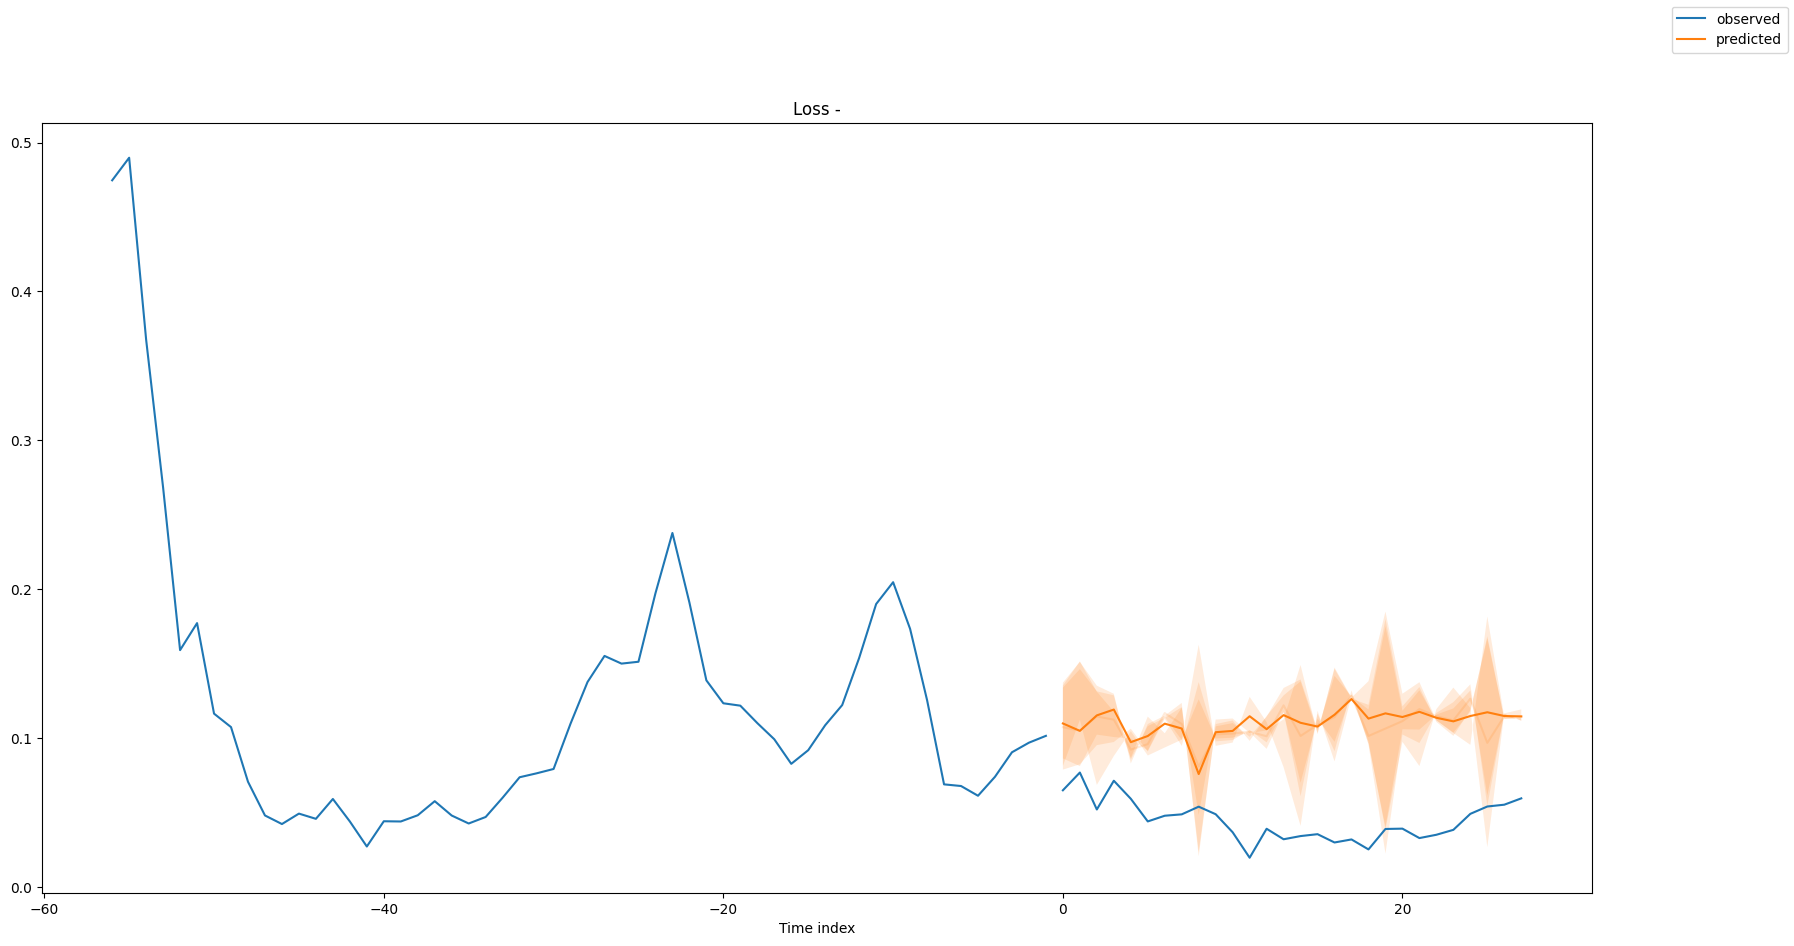

In [85]:
import matplotlib.pyplot as plt

raw_predictions = best_deepvar.predict(test_loader,
                              mode="raw", return_x=True)

test_preds = raw_predictions[0]['prediction']
x = raw_predictions[1]['encoder_target']
fig, ax = plt.subplots(figsize=(20, 10))
best_deepvar.plot_prediction(raw_predictions.x, raw_predictions.output, add_loss_to_title=True, ax=ax)